# 01-13: Central Tendency


**NOTE**: *This notebook makes use of [interactive notebook widgets](https://ipywidgets.readthedocs.io/en/8.1.2/) which won't appear if you're viewing this notebook on the course website. Make sure to clone and run it locally using the Github Classroom link provided for this week!*

## Central Limit Theorem Recap
The central limit theorem tells us that if we repeatedly take samples from a population and calculate a statistic like the mean for each sample, the distribution of these sample means will:

1. Be approximately normal, even if the original population is not.
2. Center around the true population mean.

## Central Tendency
In order to describe a sample we often care about its **central tendency** or the most "typical" or "central" value that represents a dataset. The most common measures of central tendency are:  

**Mode**: The most frequent value  
**Mean**: The arithmetic average  
**Median**: The middle value when data are ordered  

## Mode

The **mode** is the value that appears most frequently in a dataset. It is the simplest measure of central tendency and is often used for categorical data.

### Formula
For a dataset $(X = \{x_1, x_2, ..., x_n\})$, the mode $(M)$ satisfies:
$$
M = \text{argmax}_x \; \text{Frequency}(x)
$$

### Intuition
The mode represents the most "popular" value in the data. While the mode is easy to understand and compute, it might not always exist (e.g., in uniform distributions) or might not be unique if multiple values occur with the same maximum frequency

### Visual

*We're going to use start to introduce some basic scientific python libraries here to make it easier to generate, summarize, and visualize random data. We'll do more deep dives into these libraries later*

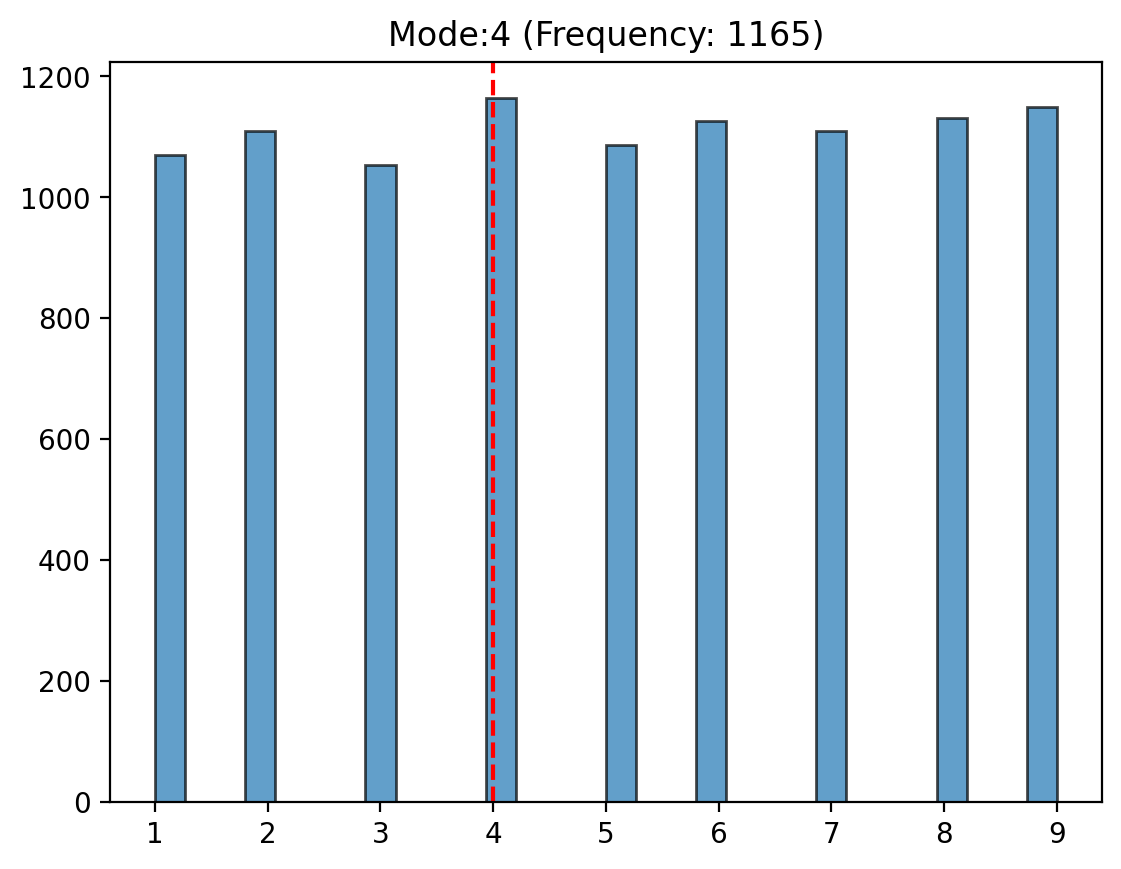

In [30]:
import numpy as np # numerical library
from scipy import stats # basic statistical library
import matplotlib.pyplot as plt # basic plotting library

population_size = 10000

# We can quickly generate lists/arrays of numbers with numpyh
population = np.random.randint(1, 10, size=population_size)

# Calculate mode
mode_value, count = stats.mode(population)

# Visualize mode
plt.hist(population, bins=30, edgecolor="black", alpha=0.7);
plt.axvline(mode_value, color="red", linestyle="--");
plt.title(f"Mode:{mode_value} (Frequency: {count})");

## Mean

The **mean** is the arithmetic average of a dataset and is one of the most commonly used measures of central tendency.

### Formula
For a dataset $(X = \{x_1, x_2, ..., x_n\})$, the mean $(\mu)$ is:
$$
\mu = \frac{1}{n} \sum_{i=1}^n x_i
$$

### Intuition
The mean is often described as the "center of mass" of the data. It is sensitive to outliers, which can pull the mean away from the bulk of the data.

### Visual

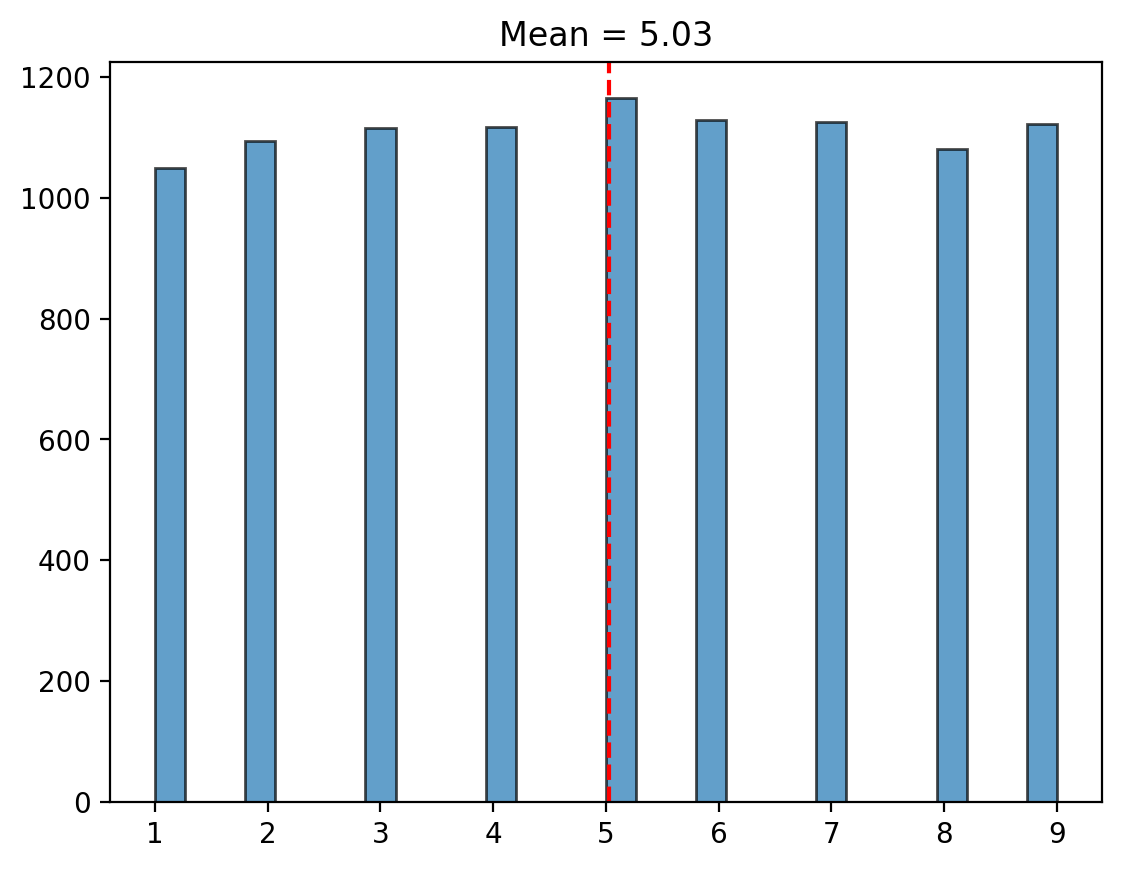

In [52]:
import numpy as np # numerical library
from scipy import stats # basic statistical library
import matplotlib.pyplot as plt # basic plotting library

population_size = 10000

# We can quickly generate lists/arrays of numbers with numpy
population = np.random.randint(1, 10, size=population_size)

# Calculate mean
mean_value= np.mean(population)

# Visualize mean
plt.hist(population, bins=30, edgecolor="black", alpha=0.7);
plt.axvline(mean_value, color="red", linestyle="--")
plt.title(f"Mean = {mean_value:.2f}");

## Median

The **median** is the middle value of a dataset when it is sorted in ascending order. If the dataset has an even number of observations, the median is the average of the two middle values.

### Formula
For a sorted dataset $(X = \{x_1, x_2, ..., x_n\})$:
$$
\text{Median} = \begin{cases} 
      x_{(n+1)/2}, & \text{if } n \text{ is odd} \\
      \frac{x_{n/2} + x_{n/2+1}}{2}, & \text{if } n \text{ is even}
   \end{cases}
$$

### Intuition
The median is known as a "robust measure" of central tendency because it's less sensitive to outliers compared to the mean.

### Visual

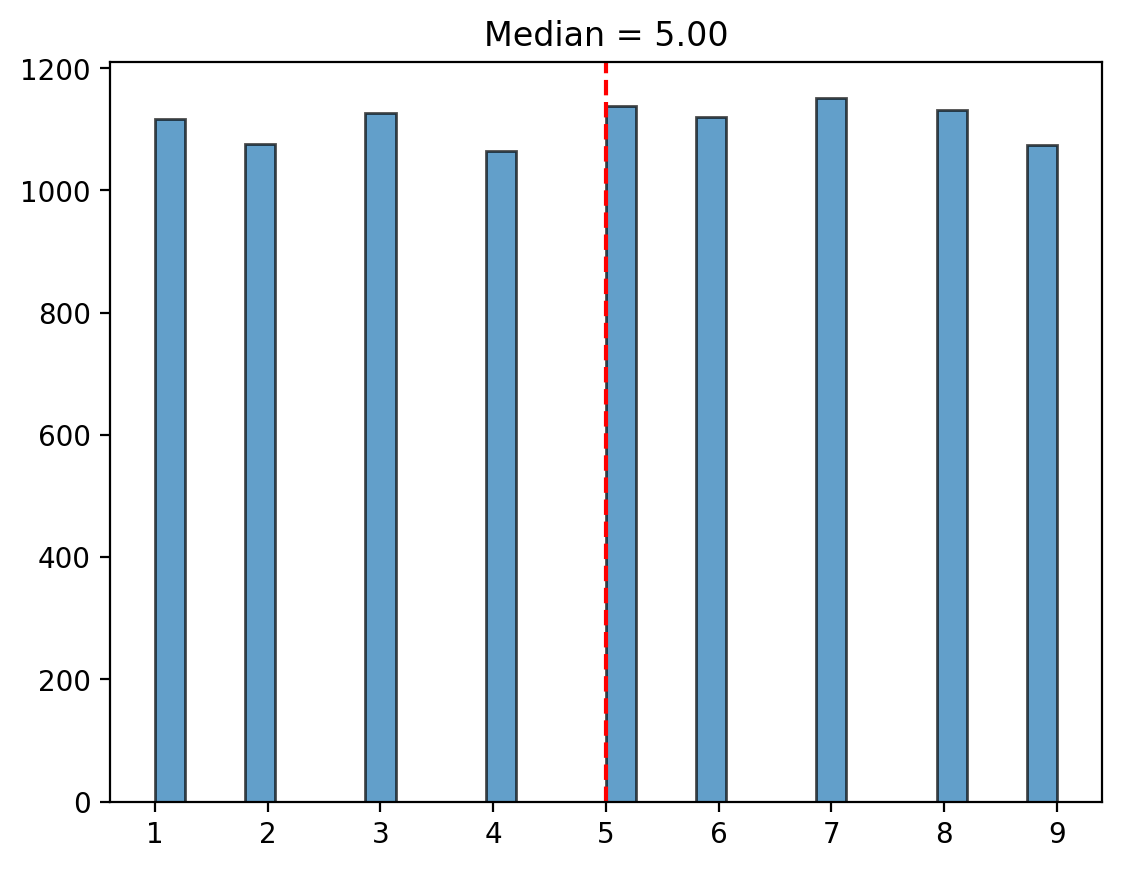

In [53]:
import numpy as np # numerical library
from scipy import stats # basic statistical library
import matplotlib.pyplot as plt # basic plotting library

population_size = 10000

# We can quickly generate lists/arrays of numbers with numpy
population = np.random.randint(1, 10, size=population_size)

# Calculate median
median_value= np.median(population)

# Visualize median
plt.hist(population, bins=30, edgecolor="black", alpha=0.7);
plt.axvline(median_value, color="red", linestyle="--")
plt.title(f"Median = {median_value:.2f}");

## Exercise
Using the code examples above, along with [`numpy.random` documentation](https://numpy.org/doc/stable/reference/random/legacy.html#simple-random-data) to generate a few more figures that sample from alternative distributions

In [ ]:
# EDIT ME!
import numpy as np # numerical library
from scipy import stats # basic statistical library
import matplotlib.pyplot as plt # basic plotting library

population_size = 10000

# Use np.random to generate a population from a different distribution
population = 

# Calculate summary statistic
value = 

# Visualize value
plt.hist(population, bins=30, edgecolor="black", alpha=0.7);
plt.axvline(value, color="red", linestyle="--")
plt.title(f"Statistic = {value:.2f}");

## Two Cultures, Two Perspectives

We can think about the Mean and Median in particular through both of the lens classical statistic and statistical learning we discussed last week:

1. **Parameters of Distribution (Method of Moments):** This classical approach describes key properties of probability distributions, focusing on population-level parameters like mean and variance.
2. **Model Error (Statistical Learning):** This modern approach focuses on minimizing prediction error and generalization to new data.

Let’s explore these paradigms, visualize their concepts, and expand on the ideas of bias, variance, and their trade-offs.

### As parameters of a distribution (Method of Moments)

The method of moments is a classical statistical approach emphasizing the understanding of distributions through their "moments" (mean, variance, skewness, etc.). This perspective is closely associated with *Sir Francis Galton* and *Karl Pearson* pioneers in statistical theory. 

The perspective uses parameters like the mean/media to **descibe the "shape" of a distribution**

This perspective should feel more intuitive as it's how we've been visualizing these ideas so far, and should feel familiar from previous courses you've taken.

### As model error (Statistical Learning)

In contrast to classical methods, statistical learning focuses on minimizing error to improve **predictive performance**. This paradigm was popularized by *Leo Breiman* in his seminal paper "Statistical Modeling: The Two Cultures" that we discussed in week 1.

From this perspective, parameters like the mean/media can be viewed as *simple models* that **minimize different error metrics**.

- Mean: Minimizes **Sum of Squared Errors (SSE)**.
- Median: Minimizes **Sum of Absolute Errors (SAE)**.

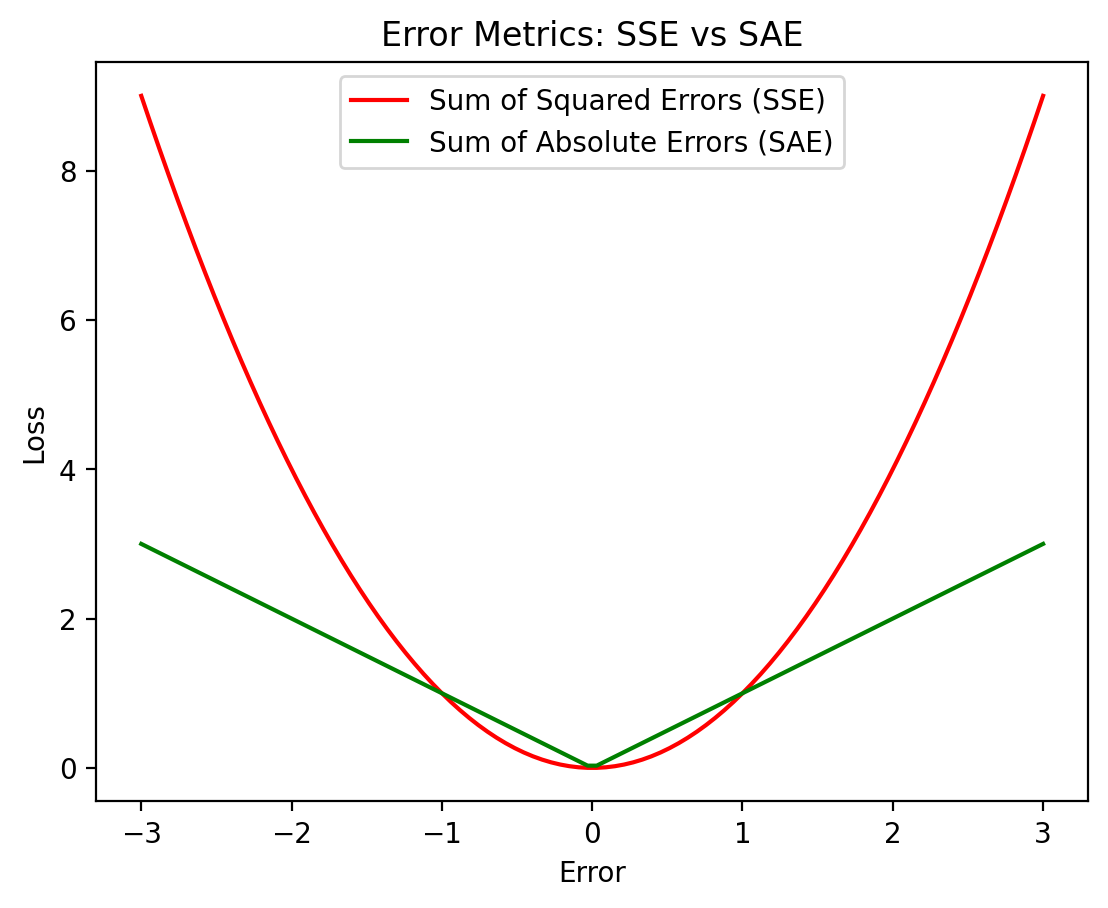

In [ ]:
# Plot code
errors = np.linspace(-3, 3, 100)
sse = errors**2
sae = np.abs(errors)

plt.plot(errors, sse, label='Sum of Squared Errors (SSE)', color='red');
plt.plot(errors, sae, label='Sum of Absolute Errors (SAE)', color='green');
plt.title('Error Metrics: SSE vs SAE');
plt.xlabel('Error');
plt.ylabel('Loss');
plt.legend();
plt.show();

These metrics highlight different trade-offs in robustness and sensitivity:

**Sum-of-Squared-Error (SSE)**, penalizes large errors more heavily (quadratically), making it **sensitive to outliers**

**Sum-of-Absolute-Error (SAE)**, grows linearly with error, offering more robustness to outliers.

### SSE, SAE, and connection to the Bias-Variance Tradeoff

Remember that the **total error** of a model can be decomposed into three components:
1. **Bias**: Error introduced by approximating a real-world problem with a simplified model.
2. **Variance**: Error from model sensitivity to fluctuations in the training data.
3. **Irreducible Error**: Noise inherent in the data that cannot be eliminated.



$$
\text{Total Error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}

$$

When minimizing **SSE**, we prioritize **reducing variance** but may introduce **larger bias**, as outliers have a disproportionate influence.

As we build up to the General-Linear-Model, we'll see how its most basic form (linear regression) takes this approach, minimizing SSE to favor more interpertable parameters with **higher bias** and **lower variance**


When minimizing **SAE**, we emphasize robustness, often resulting in **lower bias** when dealing with non-symmetric or skewed data (less influence of extreme observations) at the expensive of potentially **higher variance** compared to the mean.

*NOTE: You can ignore the code below and just run the cell*

In [ ]:
# widget code
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider


# Function to generate data and compute errors
def bias_variance_tradeoff(prop_outliers=0):
    np.random.seed(0)
    true_value = 0
    pop_size = 100
    outlier_factor = 1.0
    data = np.random.normal(loc=true_value, scale=1.0, size=pop_size)

    # Introduce an outliers
    num_outliers = int(prop_outliers * pop_size)
    outliers = np.array([4] * num_outliers)
    # outliers = np.array([outlier_factor] * num_outliers)
    data_with_outlier = np.hstack((data, outliers))
    # data_with_outlier = np.append(data, outlier_factor * 10)

    # Compute mean and median
    mean_prediction = np.mean(data_with_outlier)
    median_prediction = np.median(data_with_outlier)

    # Calculate SSE and SAE for mean and median
    sse_mean = np.sum((data_with_outlier - mean_prediction) ** 2)
    sae_median = np.sum(np.abs(data_with_outlier - median_prediction))

    # Plot data and predictions
    plt.figure(figsize=(10, 6))
    plt.hist(data_with_outlier, alpha=0.5, label="Data with Outlier")
    plt.axvline(
        true_value, color="black", linestyle="-", label=f"True Value: {true_value:.2f}"
    )
    plt.axvline(
        mean_prediction, color="red", linestyle="--", label=f"Mean (SSE: {sse_mean:.2f}"
    )
    plt.axvline(
        median_prediction,
        color="green",
        linestyle="--",
        label=f"Median (SAE: {sae_median:.2f})",
    )
    plt.title(
        f"True Value: {true_value:.2f}\nMean: {mean_prediction:.2f} Median: {median_prediction:.2f}"
    )
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


# Create an interactive widget
interact(
    bias_variance_tradeoff,
    prop_outliers=FloatSlider(
        value=0.0, min=0.0, max=1.0, step=0.01, description="% Outliers"
    ),
)

interactive(children=(FloatSlider(value=0.0, description='% Outliers', max=1.0, step=0.01), Output()), _dom_cl…

<function __main__.bias_variance_tradeoff(prop_outliers=0)>

## Next Time

We'll start to dive into **using simulations to build intuitions** and better understand **summary statistics as estimators**.

We'll talk about Monte-carlo methods and discuss what the two major forms of **resampling** (with and without replacement) allow us to do.
